**Workout Generator using Gensim Doc2Vec Model**

*The model aims to generate a list of workouts based on user input*

In [1]:
from os import listdir
import re
import matplotlib.pyplot as plt
from nltk import RegexpTokenizer
from stop_words import get_stop_words
from gensim.models.doc2vec import TaggedDocument
from gensim.parsing.porter import PorterStemmer
import gensim
import pandas as pd
import numpy as np

In [2]:
#grab data
docLabels=[]        
docLabels = [f for f in listdir("Data/Total_Data") if f.endswith('.txt')]

data=[]
for doc in docLabels:
    data.append(open('Data/Total_Data/' + doc).read())

In [3]:
for i in data[:5]:
    print(i)

"Nancy"
5 rounds for time of:
400 meter run
95 pound Overhead squat, 15 reps
Brian Mitchell 11:35, Aaron Moburg-Jones 12:07, Rob Orlando 12:14, Jay Maroney 14:59.
Post time to comments.
Compare to 110616.


Deadlift 1-1-1-1-1-1-1 reps
Post loads to comments.


Run 5 K
Post time to comments.
Compare to 091009.


Five rounds for time of:
135 pound Deadlift, 15 reps
135 pound Hang power clean, 12 reps
135 pound Front Squat, 9 reps
135 pound Push Jerk, 6 reps
Post time to comments.
Compare to 080702.


Workout 16.5
21-18-15-12-9-6-3 reps for time of:
Thrusters
Burpees
Men use 95 lb.
Women use 65 lb.
Compare to 140328.
Post time to comments and/or submit your score as part of the 2016 Reebok CrossFit Games Open.




In [4]:
#DATA CLEANING

#delete scores, post and comment substrings
regex_list = [r"Divide/s[^@]*.*", r"Multiply/s[^@]*.*", r"Add\s[^@]*.*", r"There is[^@]*.*", \
              r"[Nn]otes:[^@]*.[^@]*", r"[Pp]ost[^@]*.*", r"[Rr]eport[^@]*.*", r"In this[^@]*.*", \
              r"and post to comments.*", r"[Cc]ompare[^@]*.*", r"to comments.*", r"[Cc]omment.*"]

#delete text not related to exercises
data2=[]
for string in data:
    string2 = re.sub("|".join(regex_list), '', string)
    string3 = string2.strip()
    data2.append(string3)

#split grouped workouts (grouped by 'OR') into two
data3=[item for current in data2 for item in current.split('OR')]

#delete substrings with member records and times
regex_list2=[r'\n{1,}[A-Z]+[a-z]*\s[A-Z]+[a-z]*[A-Z]?[a-z]*[:|\s][\s]?[(0-9]', \
             r'[Ii]n honor of','Go for PR', r'The assigned name is new', r'expected',\
             r'workout instructions', r'Grace: John McKay', r'Happy birthday', \
             r'"Hope" has the same format', r'Fight Gone Bad!"\nThis is our famous', \
             r'Hero workout of your choice.']

data4=[]
sep='DELETE'
for string in data3:
    string2 = re.sub("|".join(regex_list2), 'DELETE', string)
    string3 = string2.replace('\n\n', 'DELETE')
    string4 = string3.split(sep, 1)[0]
    final = string4.rstrip()
    #final = rest.lower()
    data4.append(final)

#only unique workouts -- 2,360 unique workouts
final_data = list(set(data4))   
print(len(final_data))
final_data_length=len(final_data)
#drop bad data -- workouts that are blank, etc.
for index, k in enumerate(final_data):
    if len(k) < 5:
        final_data.pop(index)

#copy data
model_data=final_data

2360


In [5]:
for i in final_data[:5]:
    print(i, "\n")

Five rounds for time of:
Run 400 meters
15 Pull-ups
15 reps, 75 pound overhead squat
Take overhead squats to bottom. Reduce weight or slow down if needed. 

Murph
For time:
1-mile run
100 pull-ups
200 push-ups
300 squats
1-mile run
Partition the pull-ups, push-ups, and squats as needed. Start and finish with a mile run. If you've got a 20-lb. vest or body armor, wear it. 

3 rounds for time of:
10 dumbbell hang squat snatches, left arm
5 bar muscle-ups
10 dumbbell hang squat snatches, right arm
5 bar muscle-ups
Use a 55-lb. dumbbell for the snatches. 

Deadlift 3-3-1-1-1-1-1 reps
Warm-up! Work at slow pace. 

For time:
Squat 5 intervals of 20 seconds on 10 off,
Run 400 meters,
Squat 4 intervals of 20 seconds on 10 off,
Run 400 meters,
Squat 3 intervals of 20 seconds on 10 off,
Run 400 meters,
Squat 2 intervals of 20 seconds on 10 off,
Run 400 meters,
Squat 1 interval of 20 seconds. 



<Container object of 19 artists>

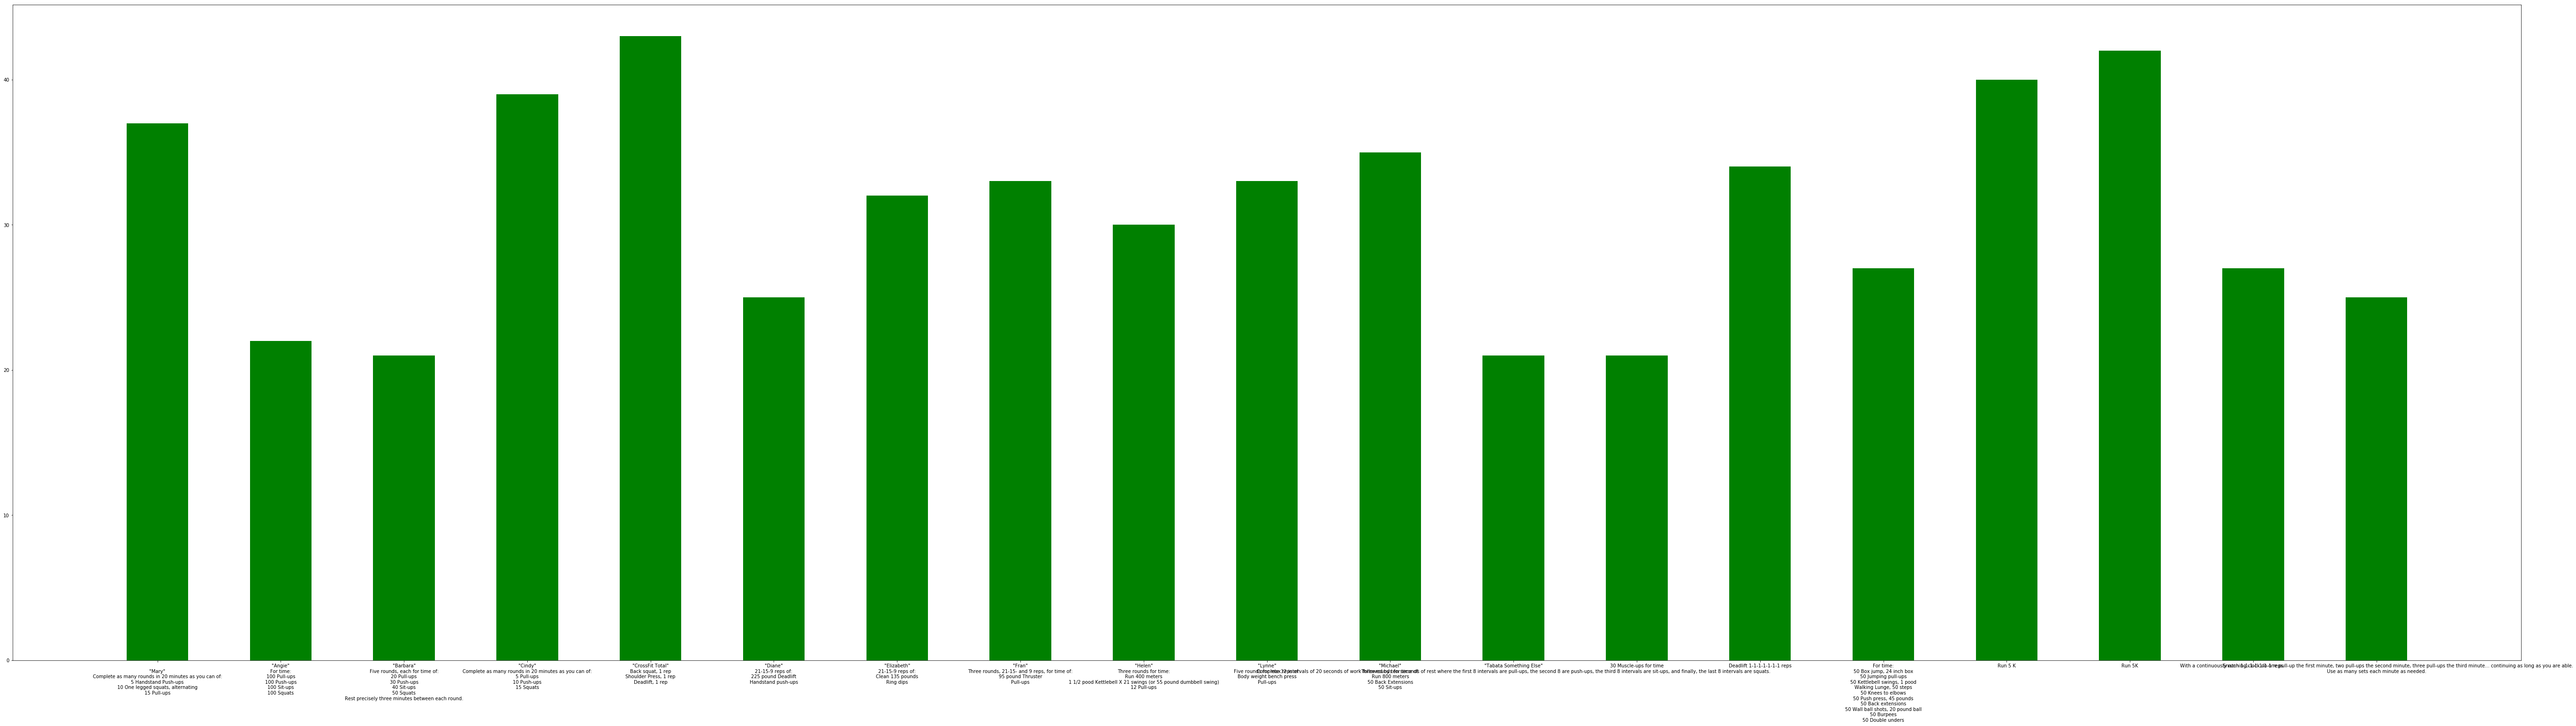

In [6]:
#plot top exercise frequencies

ex_freq = {}
unwanted_chars = "''"
for raw_string in data4:
    string = raw_string.strip(unwanted_chars)
    if string not in ex_freq:
        ex_freq[string] = 0 
    ex_freq[string] += 1
del ex_freq['']
#most frequent workouts 
ex_freq2 = dict((key, value) for key, value in ex_freq.items() if value > 20)


%matplotlib inline

width=.5
fig = plt.figure(figsize=(75, 20))
ax = fig.add_subplot(111)
plt.tight_layout()

plt.bar(ex_freq2.keys(), ex_freq2.values(), width, color='g')

<Container object of 69 artists>

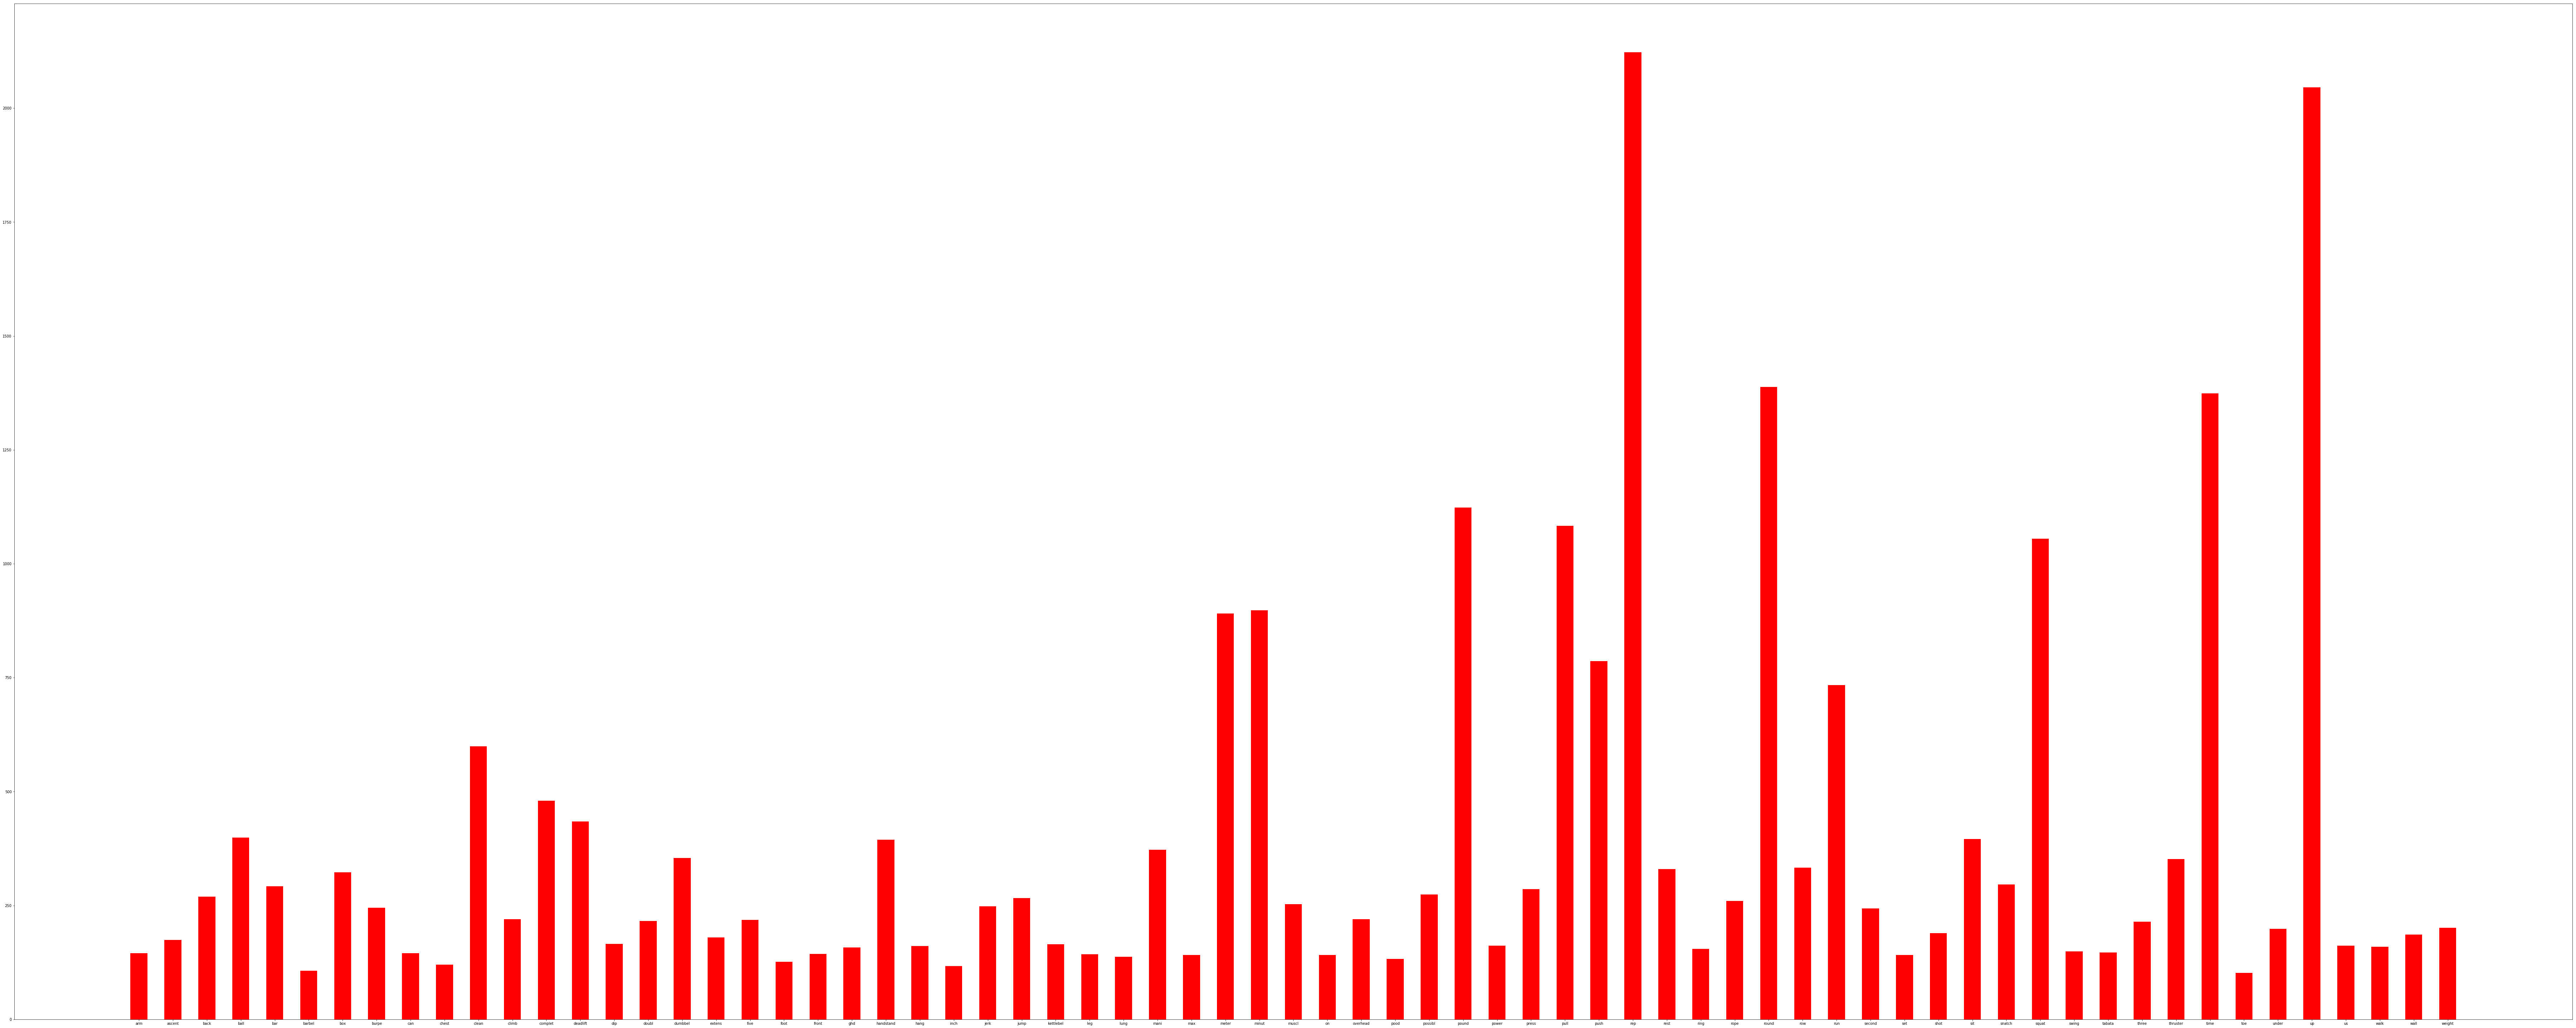

In [7]:
#plot frequencies of top words in workouts -> help to understand types of workouts crossfit offers

stop_words = get_stop_words('en')
p_stemmer = PorterStemmer()

top_word=[]
top_words=[]
for words in final_data:
    words2=words.lower()
    top_word = re.sub("[^\w]", " ",  words2).split()
    top_word2 = [i for i in top_word if not i in stop_words]
    top_word3 = [i for i in top_word2 if len(i) > 2]
    top_word4 = [i for i in top_word3 if not i.isdigit()]
    stemmed_words = [p_stemmer.stem(i) for i in top_word4]

    for i in stemmed_words:
        top_words.append(i)

word_freq = {}
for word in top_words:
    if word not in word_freq:
        word_freq[word] = 0 
    word_freq[word] += 1

word_freq2 = dict((key, value) for key, value in word_freq.items() if value > 100)

%matplotlib inline
width=.5
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
plt.tight_layout()

plt.bar(word_freq2.keys(), word_freq2.values(), width, color='r')

**High Frequency Words:**
1. *REPS* -> level of intensity
2. *UP* -> bodyweight exercises (pull-ups, push-ups, sit-ups, etc.)
3. *TIME* -> workout based on speed
4. *ROUND* -> workouts based on amnount of work to complete
5. *POUND* -> weighted exercises

In [8]:
#tokenize and process data for modeling

tokenizer = RegexpTokenizer(r'\w+')
stop_words = get_stop_words('en')
p_stemmer = PorterStemmer()

taggeddoc=[]
texts=[]

for index,wod in enumerate(model_data):
    wordslist=[]
    tagslist=[]
    tokens = tokenizer.tokenize(wod.lower())
    
    #stop words
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    #remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in stopped_tokens]
    number_tokens = ' '.join(number_tokens).split()
    
    #stemmed tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    
    #remove empty
    length_tokens = [i for i in stemmed_tokens if len(i)  > 1]
    texts.append(length_tokens)
    
    td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(), [str(index)]) 
    taggeddoc.append(td)
    
documents=taggeddoc

In [9]:
print(documents[0], "\n\n")
print(model_data[0])

TaggedDocument(['five', 'round', 'time', 'run', 'meter', 'pull', 'up', 'rep', 'pound', 'overhead', 'squat', 'take', 'overhead', 'squat', 'bottom', 'reduc', 'weight', 'slow', 'need'], ['0']) 


Five rounds for time of:
Run 400 meters
15 Pull-ups
15 reps, 75 pound overhead squat
Take overhead squats to bottom. Reduce weight or slow down if needed.


In [10]:
#initialize and train model

from random import shuffle

def modelBuild(iterations, size, word_count):
    global modelsDF
    modelsDF=pd.DataFrame(columns=['Model','Iteration','Dimensionality_Size','Min_Word_Count'])
    
    for i in range(100, iterations+1, 10): 
        for j in range(3, size+1):
            for k in range(7, word_count+1):
                
                #model initialization
                model=gensim.models.Doc2Vec(dm=0, dbow_words=1, size=i, iter=j, min_count=k, alpha=0.025, min_alpha=0.025)
                
                #build vocabulary
                shuffle(documents)
                model.build_vocab(documents)
               
                #train model
                model.train(documents, total_examples=len(documents), epochs=model.iter)
                
                #append model to modelsDF
                modelsDF = modelsDF.append({'Model': model, 'Iteration': i, 'Dimensionality_Size': j, 'Min_Word_Count': k}, ignore_index=True)
                

In [11]:
#Generate models
modelBuild(200, 8, 20)

In [12]:
#create list of similar workouts for each model

stop_words = get_stop_words('en')

def similarWODS(string):
    global modelWOList
    modelWOList=[]
    for i in range(len(modelsDF)):
        WOList=[]
        modeltest=modelsDF.loc[i][0]
        user_input = string.lower()
        user_words = user_input.split()
        user_input2 = [i for i in user_words if not i in stop_words]
        user_vector = modeltest.infer_vector(user_input2)
        sims = modeltest.docvecs.most_similar([user_vector], topn=7)
        for j in sims:
            for idx, k in enumerate(j):
                if idx%2 == 0:
                    WOIdx = int(k)
                    TopWO = final_data[WOIdx]
                    WOList.append(TopWO)
                    
        modelWOList.append(WOList)
        
    for idx, wod in enumerate(modelWOList[:2]):
        print("* Model Numder", idx, "*")
        print("Workout of Interest:", "\n", string, "\n", "-"*20)
        for wo in wod:
            print(wo, "\n", "-"*40)
            
#     return modelWOList

In [13]:
#model evaluation
#check for number of matches and percent of matching words between inputted workout and top similar workouts

stop_words = get_stop_words('en')

def modelEval(workoutOfInterest):
    
    WOofInterest = workoutOfInterest.split()
    WOofInterest2 = [i for i in WOofInterest if not i in stop_words]
    WOofInterest3 = [i for i in WOofInterest2 if not i.isdigit()]

    modelMatches=[]
    modelPercent=[]

    for i in range(len(modelWOList)):
        matchList=[]
        matchListPercent=[]
        for j in modelWOList[i]:
            raw = j.lower()
            words = raw.split()
            final = [i for i in words if not i in stop_words]
            final2 = [i for i in final if len(i) > 2]
            final3 = [i for i in final2 if not i.isdigit()]

            results={}
            for k in WOofInterest3:
                r_key = '{}'.format(k)
                results[r_key] = final3.count(k)

            matches = sum(results.values())
            matchList.append(matches)
            matchPercent = matches/len(set(final))
            matchListPercent.append(matchPercent)

        modelMatchSum = sum(matchList)
        modelMatches.append((i, modelMatchSum))
        modelPerc = sum(matchListPercent)/len(modelWOList)
        modelPercent.append((i, modelPerc))


    #highest perorming models
    mostMatchesModel=max(modelMatches,key=lambda item:item[1])
    print(mostMatchesModel)
    mostMatchesModelIdx=mostMatchesModel[0]
    print(modelsDF.loc[mostMatchesModelIdx], "\n")

    highestPercentModel=max(modelPercent,key=lambda item:item[1])
    print(highestPercentModel)
    mhighestPercentModelIdx=highestPercentModel[0]
    print(modelsDF.loc[mhighestPercentModelIdx], "\n")
    
    
#     return modelMatches 
#     return modelPercent

In [14]:
#Produce similar workouts based on user input

#input string from user
workout_string = "run and bike"
workout_string2 = workout_string.lower()
similarWODS(workout_string2)

#Evaluate similar workouts based on user input
modelEval(workout_string2)

* Model Numder 0 *
Workout of Interest: 
 run and bike 
 --------------------
Elizabeth
21-15-9 reps for time of:
135-lb. cleans
Ring dips 
 ----------------------------------------

**Mary **
Complete as many rounds in 20 minutes as you can of:
5 Handstand Push-ups
10 One legged squats, alternating
15 Pull-ups 
 ----------------------------------------
Thruster 3-3-3-3-3-3-3 reps 
 ----------------------------------------
"Thruster" 95 pounds 10 reps every minute on the minute for twenty minutes.
How far did you get? Work for twenty minutes and 
 ----------------------------------------
Working one minute and then resting one minute, for 20 minutes, how many reps of 95 pound Clean and Jerk can you total? 
 ----------------------------------------
Shoulder press 1-1-1-1-1 reps
Push press 1-1-1-1-1 reps
Push jerk 1-1-1-1-1 reps
Try to increase the load on each of the fifteen sets. 
 ----------------------------------------
Handstand walk 100 meters
If you fall, restart at the point of

In [15]:
#Produce similar workouts based on random workout from data

np.random.seed(101)

randomWOIdx = int(np.random.randint(low=0, high=final_data_length, size=1, dtype=int))
random_workout_string = final_data[randomWOIdx]
random_workout_string2 = random_workout_string.lower()
similarWODS(random_workout_string2)

#Evaluate similar workouts based on random workout from data
modelEval(random_workout_string2)

* Model Numder 0 *
Workout of Interest: 
 21-18-15-12-9 rep rounds of:
115 pound power snatch
wallball shots, 20 pound ball
knees to elbows 
 --------------------
Complete as many rounds as possible in 15 minutes of:
50-lb. dumbbell squat snatches, 5 reps, left arm
50-lb. dumbbell squat snatches, 5 reps, right arm
50 double-unders 
 ----------------------------------------
For time:
Row 1K
40 pound Dumbbell snatch, 50 reps
Row 750m
40 pound Dumbbell snatch, 35 reps
Row 500m
40 pound Dumbbell snatch, 20 reps
These are one-arm squat snatches, alternating arms. 
 ----------------------------------------
21-15-9 reps for time of:
Single-arm dumbbell snatches
Bar muscle-ups
Men use 50-lb. dumbbell
Women use 35-lb. dumbbell 
 ----------------------------------------
5 rounds for time of:
135-lb. deadlift, 9 reps
135-lb. hang power snatch, 6 reps
135-lb. overhead squat, 3 reps 
 ----------------------------------------
Power snatch 3-3-3-3-3 reps
Snatch balance 2-2-2-2-2 reps
Squat snatch 1-1

**MODEL EVALUATION**

1. Evaluate Model based on User Input
    * Size --> range(3,8)
    * Minimum Word Count --> range(11, 19)
    * Model Iterations --> range(100, 1600)
    
 
2. Evaluate Model based on Random Workout from Data
    * Size --> range(3,7)
    * Minimum Word Count --> range(13, 19)
    * Model Iterations --> range(100, 190)

**Imporovements**
1. **Data Cleaning** Regex to rewmove extra tetx
2. **Model Evaluation** Cosine Similarity between words from User-Input/Random Workout and similar workouts
3. **Additional Data** Data from different sources --> varied and well-rounded workouts
4. **Add Features** tailor workouts based on user input --> skill level, strength, etc. 
5. **Improve Model** Exercise optimizer --> creates workouts based on individual exercises

In [ ]:
#save model
# model.save('Saved Model/WO_trained.model')